In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
yellow_trips = pd.read_parquet('..\\sources\\yellow_tripdata_2024-01.parquet')
green_trips = pd.read_parquet('..\\sources\\green_tripdata_2024-01.parquet')
fhv_trips = pd.read_parquet('..\\sources\\fhv_tripdata_2024-01.parquet')

# **2. Revisión de Valores Nulos y Tipos de Datos**

In [ ]:
# Valores nulos
print(yellow_trips.isnull().sum())
print(green_trips.isnull().sum())
print(fhv_trips.isnull().sum())

# Tipos de datos
print(yellow_trips.dtypes)
print(green_trips.dtypes)
print(fhv_trips.dtypes)

**Manejo de Valores Nulos**

*Yellow Trips:*

passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge, y Airport_fee tienen un número considerable de valores nulos.
Podríamos imputar valores, eliminar registros nulos, o considerar estas variables como no críticas si los valores nulos son significativos.

*Green Trips:*

Similar a Yellow Trips, las columnas passenger_count, RatecodeID, store_and_fwd_flag, ehail_fee, y congestion_surcharge tienen valores nulos.
Evaluar si la imputación o eliminación de estos datos afectará el análisis.

*FHV:*

PUlocationID, DOlocationID, y SR_Flag tienen una gran cantidad de valores nulos.
Decidir cómo manejar estos nulos, especialmente si afectan el análisis espacial o de tipo de viaje.

In [ ]:
# Decisión basada en el análisis
yellow_trips = yellow_trips.dropna(subset=['passenger_count', 'RatecodeID'])
green_trips = green_trips.dropna(subset=['passenger_count', 'RatecodeID','trip_type'])
fhv_trips = fhv_trips.dropna(subset=['PUlocationID', 'DOlocationID'])


fhv_trips = fhv_trips.fillna({'SR_Flag': 0})
green_trips = green_trips.drop(columns=['ehail_fee'])


In [ ]:
yellow_trips

# **3. Estadísticas Descriptivas**

In [ ]:
# Estadísticas descriptivas
print(yellow_trips.describe())
print(green_trips.describe())
print(fhv_trips.describe())


Limpieza de Datos: Sería necesario limpiar y corregir estos valores atípicos y negativos para asegurar que el análisis sea preciso. Esto podría incluir la eliminación de filas con fechas claramente incorrectas, el reemplazo de valores negativos con nulos o valores estimados, y la eliminación de outliers excesivos.

Verificación de Rangos Temporales: Asegúrate de que los datos estén dentro del rango temporal correcto y de que las fechas no tengan inconsistencias que puedan afectar el análisis.

In [ ]:
# convertir valores negativos a positivos solo en columnas específicas
columnas_a_convertir = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge']

for col in columnas_a_convertir:
    yellow_trips[col] = yellow_trips[col].abs()
    green_trips[col] = green_trips[col].abs()
    # df_fhv no tiene estas columnas, por lo que no es necesario en este caso.

yellow_trips['Airport_fee'] = yellow_trips['Airport_fee'].abs()
green_trips['improvement_surcharge'] = green_trips['improvement_surcharge'].abs()

# **4. Distribución de Viajes por Ubicación**

* Identificar las Columnas Relevantes: Nos enfocaremos en las columnas PUlocationID (Pick-Up Location ID) y DOlocationID (Drop-Off Location ID) para los viajes de Yellow Trips, Green Trips y FHV. Estas columnas contienen los identificadores de las ubicaciones de origen y destino de los viajes.

* Distribución de Viajes por Ubicación:

Contar la cantidad de viajes que comenzaron (PUlocationID) y terminaron (DOlocationID) en cada ubicación.
Crear visualizaciones para mostrar cómo se distribuyen los viajes en las distintas ubicaciones.

# **YELLOW_TRIPS**

In [ ]:
import numpy as np

# Definir los intervalos para agrupar las locationID
bins = np.arange(0, yellow_trips['PULocationID'].max() + 50, 50)  # Intervalos de 50 unidades
labels = [f'{i}-{i+49}' for i in bins[:-1]]  # Etiquetas para los intervalos


In [ ]:
# Agrupar y contar por intervalos para PUlocationID
pu_yellow_binned = pd.cut(yellow_trips['PULocationID'], bins=bins, labels=labels)
pu_yellow_counts_binned = pu_yellow_binned.value_counts().sort_index()

# Agrupar y contar por intervalos para DOlocationID
do_yellow_binned = pd.cut(yellow_trips['DOLocationID'], bins=bins, labels=labels)
do_yellow_counts_binned = do_yellow_binned.value_counts().sort_index()


In [ ]:
# Visualización de la distribución por intervalos de PUlocationID
plt.figure(figsize=(14, 7))
sns.barplot(x=pu_yellow_counts_binned.index, y=pu_yellow_counts_binned.values, palette='viridis')
plt.title('Distribución de Viajes por PUlocationID en Yellow Trips (Agrupados por Intervalos)')
plt.xlabel('Intervalo de PUlocationID')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=90)
plt.show()

# Visualización de la distribución por intervalos de DOlocationID
plt.figure(figsize=(14, 7))
sns.barplot(x=do_yellow_counts_binned.index, y=do_yellow_counts_binned.values, palette='plasma')
plt.title('Distribución de Viajes por DOlocationID en Yellow Trips (Agrupados por Intervalos)')
plt.xlabel('Intervalo de DOlocationID')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=90)
plt.show()

# **GREEN_TRIPS**

In [ ]:
import numpy as np

# Definir los intervalos para agrupar las locationID
bins = np.arange(0, green_trips['PULocationID'].max() + 50, 50)  # Intervalos de 50 unidades
labels = [f'{i}-{i+49}' for i in bins[:-1]]  # Etiquetas para los intervalos


In [ ]:
# Agrupar y contar por intervalos para PUlocationID
pu_green_binned = pd.cut(green_trips['PULocationID'], bins=bins, labels=labels)
pu_green_counts_binned = pu_green_binned.value_counts().sort_index()

# Agrupar y contar por intervalos para DOlocationID
do_green_binned = pd.cut(green_trips['DOLocationID'], bins=bins, labels=labels)
do_green_counts_binned = do_green_binned.value_counts().sort_index()

In [ ]:
# Visualización de la distribución por intervalos de PUlocationID
plt.figure(figsize=(14, 7))
sns.barplot(x=pu_green_counts_binned.index, y=pu_green_counts_binned.values, palette='viridis')
plt.title('Distribución de Viajes por PUlocationID en green Trips (Agrupados por Intervalos)')
plt.xlabel('Intervalo de PUlocationID')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=90)
plt.show()

# Visualización de la distribución por intervalos de DOlocationID
plt.figure(figsize=(14, 7))
sns.barplot(x=do_green_counts_binned.index, y=do_green_counts_binned.values, palette='plasma')
plt.title('Distribución de Viajes por DOlocationID en green Trips (Agrupados por Intervalos)')
plt.xlabel('Intervalo de DOlocationID')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=90)
plt.show()

# **fhv_trips**

In [ ]:
import numpy as np

# Definir los intervalos para agrupar las locationID
bins = np.arange(0, fhv_trips['PUlocationID'].max() + 50, 50)  # Intervalos de 50 unidades
labels = [f'{i}-{i+49}' for i in bins[:-1]]  # Etiquetas para los intervalos

In [ ]:
# Agrupar y contar por intervalos para PUlocationID
pu_fhv_binned = pd.cut(fhv_trips['PUlocationID'], bins=bins, labels=labels)
pu_fhv_counts_binned = pu_fhv_binned.value_counts().sort_index()

# Agrupar y contar por intervalos para DOlocationID
do_fhv_binned = pd.cut(fhv_trips['DOlocationID'], bins=bins, labels=labels)
do_fhv_counts_binned = do_fhv_binned.value_counts().sort_index()

In [ ]:
# Visualización de la distribución por intervalos de PUlocationID
plt.figure(figsize=(14, 7))
sns.barplot(x=pu_fhv_counts_binned.index, y=pu_fhv_counts_binned.values, palette='viridis')
plt.title('Distribución de Viajes por PUlocationID en fhv Trips (Agrupados por Intervalos)')
plt.xlabel('Intervalo de PUlocationID')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=90)
plt.show()

# Visualización de la distribución por intervalos de DOlocationID
plt.figure(figsize=(14, 7))
sns.barplot(x=do_fhv_counts_binned.index, y=do_fhv_counts_binned.values, palette='plasma')
plt.title('Distribución de Viajes por DOlocationID en fhv Trips (Agrupados por Intervalos)')
plt.xlabel('Intervalo de DOlocationID')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=90)
plt.show()

In [ ]:
fhv_trips

# **5. Análisis de Tiempos**

**Aspectos a Analizar:**

* *Distribución de la duración de los viajes:* Esto implica analizar cómo se distribuyen los tiempos de viaje en los datasets (Yellow Trips, Green Trips, y FHV).

* *Análisis de la duración promedio de los viajes por día de la semana.*

* *Distribución de los viajes por intervalos de tiempo (minutos).*

* *Análisis temporal por horas del día o meses del año para identificar patrones de mayor o menor actividad.*

# **yellow_trips**

### Paso 1: Preparación de los Datos

Necesitamos asegurarnos de que la columna de `tiempo de viaje` esté correctamente definida y convertirla a una métrica de tiempo (por ejemplo, en minutos o segundos).

Si ya tienes una columna como `trip_duration` (que representa el tiempo del viaje en segundos o minutos), podemos utilizarla directamente. Si no, deberemos calcularla restando `dropoff_datetime - pickup_datetime`.

In [ ]:
# Cambiar el nombre de la columna 'tpep_pickup_datetime' a 'pickup_datetime'
yellow_trips = yellow_trips.rename(columns={'tpep_pickup_datetime': 'pickup_datetime'})
# Cambiar el nombre de la columna 'tpep_dropoff_datetime' a 'dropoff_datetime'
yellow_trips = yellow_trips.rename(columns={'tpep_dropoff_datetime': 'dropoff_datetime'})

In [ ]:
# Si no existe la columna trip_duration, la creamos en minutos
yellow_trips['pickup_datetime'] = pd.to_datetime(yellow_trips['pickup_datetime'])
yellow_trips['dropoff_datetime'] = pd.to_datetime(yellow_trips['dropoff_datetime'])

yellow_trips['trip_duration'] = (yellow_trips['dropoff_datetime'] - yellow_trips['pickup_datetime']).dt.total_seconds() / 60  # En minutos


### Paso 2: Distribución de la Duración de los Viajes

Ahora que tenemos la duración de los viajes en minutos, podemos visualizar su distribución. Esto nos ayudará a entender si la mayoría de los viajes son cortos, medianos o largos.

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(yellow_trips['trip_duration'], bins=50, color='blue', kde=True)
plt.title('Distribución de la Duración de los Viajes (Minutos) en Yellow Trips')
plt.xlabel('Duración del Viaje (Minutos)')
plt.ylabel('Cantidad de Viajes')
plt.xlim(0, 100)  # Limitar la gráfica para evitar valores atípicos
plt.show()

### Paso 3: Duración Promedio de los Viajes por Día de la Semana

Podemos analizar cómo varía la duración promedio de los viajes según el día de la semana.

In [ ]:
# Añadir columna de día de la semana
yellow_trips['day_of_week'] = yellow_trips['pickup_datetime'].dt.day_name()

# Calcular duración promedio por día de la semana
mean_duration_by_day = yellow_trips.groupby('day_of_week')['trip_duration'].mean().sort_values()

In [ ]:
# Graficar la duración promedio por día de la semana
plt.figure(figsize=(10, 5))
sns.barplot(x=mean_duration_by_day.index, y=mean_duration_by_day.values, palette='viridis')
plt.title('Duración Promedio de Viajes por Día de la Semana en Yellow Trips')
plt.xlabel('Día de la Semana')
plt.ylabel('Duración Promedio del Viaje (Minutos)')
plt.show()

### Paso 4: Distribución por Intervalos de Tiempo

Podemos agrupar la duración de los viajes en intervalos de tiempo y contar cuántos viajes caen dentro de cada intervalo.


In [ ]:
# Definir los intervalos de tiempo (en minutos)
bins_duration = [0, 5, 10, 15, 20, 30, 40, 60, 120, 240]
labels_duration = ['0-5 min', '5-10 min', '10-15 min', '15-20 min', '20-30 min', '30-40 min', '40-60 min', '60-120 min', '120+ min']

# Agrupar la duración de los viajes por intervalos
yellow_trips['duration_binned'] = pd.cut(yellow_trips['trip_duration'], bins=bins_duration, labels=labels_duration)

# Contar la cantidad de viajes en cada intervalo
duration_counts = yellow_trips['duration_binned'].value_counts().sort_index()


In [ ]:
# Graficar la distribución por intervalos de duración
plt.figure(figsize=(12, 6))
sns.barplot(x=duration_counts.index, y=duration_counts.values, palette='plasma')
plt.title('Distribución de Viajes por Intervalos de Duración en Yellow Trips')
plt.xlabel('Intervalo de Duración del Viaje')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=45)
plt.show()

### Paso 5: Análisis por Hora del Día

Analizar cómo varía la cantidad de viajes y su duración según la hora del día puede ser útil para identificar patrones temporales.

In [ ]:
# Añadir columna de hora del día
yellow_trips['hour_of_day'] = yellow_trips['pickup_datetime'].dt.hour

# Calcular duración promedio por hora del día
mean_duration_by_hour = yellow_trips.groupby('hour_of_day')['trip_duration'].mean()


In [ ]:
# Graficar la duración promedio por hora del día
plt.figure(figsize=(10, 5))
sns.lineplot(x=mean_duration_by_hour.index, y=mean_duration_by_hour.values, marker='o', color='green')
plt.title('Duración Promedio de Viajes por Hora del Día en Yellow Trips')
plt.xlabel('Hora del Día')
plt.ylabel('Duración Promedio del Viaje (Minutos)')
plt.grid(True)
plt.show()

# **green_trips**

1

In [ ]:
# Cambiar el nombre de la columna 'tpep_pickup_datetime' a 'pickup_datetime'
green_trips = green_trips.rename(columns={'lpep_pickup_datetime': 'pickup_datetime'})
# Cambiar el nombre de la columna 'tpep_dropoff_datetime' a 'dropoff_datetime'
green_trips = green_trips.rename(columns={'lpep_dropoff_datetime': 'dropoff_datetime'})

In [ ]:
# Si no existe la columna trip_duration, la creamos en minutos
green_trips['pickup_datetime'] = pd.to_datetime(green_trips['pickup_datetime'])
green_trips['dropoff_datetime'] = pd.to_datetime(green_trips['dropoff_datetime'])

green_trips['trip_duration'] = (green_trips['dropoff_datetime'] - green_trips['pickup_datetime']).dt.total_seconds() / 60  # En minutos


2

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(green_trips['trip_duration'], bins=50, color='blue', kde=True)
plt.title('Distribución de la Duración de los Viajes (Minutos) en green_trips')
plt.xlabel('Duración del Viaje (Minutos)')
plt.ylabel('Cantidad de Viajes')
plt.xlim(0, 100)  # Limitar la gráfica para evitar valores atípicos
plt.show()

3

In [ ]:
# Añadir columna de día de la semana
green_trips['day_of_week'] = green_trips['pickup_datetime'].dt.day_name()

# Calcular duración promedio por día de la semana
mean_duration_by_day = green_trips.groupby('day_of_week')['trip_duration'].mean().sort_values()

In [ ]:
# Graficar la duración promedio por día de la semana
plt.figure(figsize=(10, 5))
sns.barplot(x=mean_duration_by_day.index, y=mean_duration_by_day.values, palette='viridis')
plt.title('Duración Promedio de Viajes por Día de la Semana en green_trips')
plt.xlabel('Día de la Semana')
plt.ylabel('Duración Promedio del Viaje (Minutos)')
plt.show()

4

In [ ]:
# Definir los intervalos de tiempo (en minutos)
bins_duration = [0, 5, 10, 15, 20, 30, 40, 60, 120, 240]
labels_duration = ['0-5 min', '5-10 min', '10-15 min', '15-20 min', '20-30 min', '30-40 min', '40-60 min', '60-120 min', '120+ min']

# Agrupar la duración de los viajes por intervalos
green_trips['duration_binned'] = pd.cut(green_trips['trip_duration'], bins=bins_duration, labels=labels_duration)

# Contar la cantidad de viajes en cada intervalo
duration_counts = green_trips['duration_binned'].value_counts().sort_index()

In [ ]:
# Graficar la distribución por intervalos de duración
plt.figure(figsize=(12, 6))
sns.barplot(x=duration_counts.index, y=duration_counts.values, palette='plasma')
plt.title('Distribución de Viajes por Intervalos de Duración en green_trips')
plt.xlabel('Intervalo de Duración del Viaje')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=45)
plt.show()

5

In [ ]:
# Añadir columna de hora del día
green_trips['hour_of_day'] = green_trips['pickup_datetime'].dt.hour

# Calcular duración promedio por hora del día
mean_duration_by_hour = green_trips.groupby('hour_of_day')['trip_duration'].mean()

In [ ]:
# Graficar la duración promedio por hora del día
plt.figure(figsize=(10, 5))
sns.lineplot(x=mean_duration_by_hour.index, y=mean_duration_by_hour.values, marker='o', color='green')
plt.title('Duración Promedio de Viajes por Hora del Día en green_trips')
plt.xlabel('Hora del Día')
plt.ylabel('Duración Promedio del Viaje (Minutos)')
plt.grid(True)
plt.show()

# **fhv_trips**

1

In [ ]:
# Cambiar el nombre de la columna 'tpep_pickup_datetime' a 'pickup_datetime'
fhv_trips = fhv_trips.rename(columns={'lpep_pickup_datetime': 'pickup_datetime'})
# Cambiar el nombre de la columna 'tpep_dropoff_datetime' a 'dropoff_datetime'
fhv_trips = fhv_trips.rename(columns={'dropOff_datetime': 'dropoff_datetime'})

In [ ]:
# Si no existe la columna trip_duration, la creamos en minutos
fhv_trips['pickup_datetime'] = pd.to_datetime(fhv_trips['pickup_datetime'])
fhv_trips['dropoff_datetime'] = pd.to_datetime(fhv_trips['dropoff_datetime'])

fhv_trips['trip_duration'] = (fhv_trips['dropoff_datetime'] - fhv_trips['pickup_datetime']).dt.total_seconds() / 60  # En minutos

2

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(fhv_trips['trip_duration'], bins=50, color='blue', kde=True)
plt.title('Distribución de la Duración de los Viajes (Minutos) en fhv_trips')
plt.xlabel('Duración del Viaje (Minutos)')
plt.ylabel('Cantidad de Viajes')
plt.xlim(0, 100)  # Limitar la gráfica para evitar valores atípicos
plt.show()

3

In [ ]:
# Añadir columna de día de la semana
fhv_trips['day_of_week'] = fhv_trips['pickup_datetime'].dt.day_name()

# Calcular duración promedio por día de la semana
mean_duration_by_day = fhv_trips.groupby('day_of_week')['trip_duration'].mean().sort_values()

In [ ]:
# Graficar la duración promedio por día de la semana
plt.figure(figsize=(10, 5))
sns.barplot(x=mean_duration_by_day.index, y=mean_duration_by_day.values, palette='viridis')
plt.title('Duración Promedio de Viajes por Día de la Semana en fhv_trips')
plt.xlabel('Día de la Semana')
plt.ylabel('Duración Promedio del Viaje (Minutos)')
plt.show()

4

In [ ]:
# Definir los intervalos de tiempo (en minutos)
bins_duration = [0, 5, 10, 15, 20, 30, 40, 60, 120, 240]
labels_duration = ['0-5 min', '5-10 min', '10-15 min', '15-20 min', '20-30 min', '30-40 min', '40-60 min', '60-120 min', '120+ min']

# Agrupar la duración de los viajes por intervalos
fhv_trips['duration_binned'] = pd.cut(fhv_trips['trip_duration'], bins=bins_duration, labels=labels_duration)

# Contar la cantidad de viajes en cada intervalo
duration_counts = fhv_trips['duration_binned'].value_counts().sort_index()

In [ ]:
# Graficar la distribución por intervalos de duración
plt.figure(figsize=(12, 6))
sns.barplot(x=duration_counts.index, y=duration_counts.values, palette='plasma')
plt.title('Distribución de Viajes por Intervalos de Duración en fhv_trips')
plt.xlabel('Intervalo de Duración del Viaje')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=45)
plt.show()

5

In [ ]:
# Añadir columna de hora del día
fhv_trips['hour_of_day'] = fhv_trips['pickup_datetime'].dt.hour

# Calcular duración promedio por hora del día
mean_duration_by_hour = fhv_trips.groupby('hour_of_day')['trip_duration'].mean()

In [ ]:
# Graficar la duración promedio por hora del día
plt.figure(figsize=(10, 5))
sns.lineplot(x=mean_duration_by_hour.index, y=mean_duration_by_hour.values, marker='o', color='green')
plt.title('Duración Promedio de Viajes por Hora del Día en fhv_trips')
plt.xlabel('Hora del Día')
plt.ylabel('Duración Promedio del Viaje (Minutos)')
plt.grid(True)
plt.show()

# **punto 6: Análisis de Tarifas**

### Aspectos a Analizar:

1. **Distribución de las tarifas base** (`fare_amount`).
2. **Análisis de cargos adicionales** como `surcharge`, `extra`, `tip_amount`, etc.
3. **Relación entre la tarifa y la duración del viaje**.
4. **Tarifa promedio por día de la semana y hora del día**.
5. **Distribución de las tarifas por intervalos**.

### Paso 1: Distribución de la Tarifa Base

Analizamos cómo se distribuyen las tarifas base (`fare_amount`) para obtener una visión general.

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(yellow_trips['fare_amount'], bins=50, color='blue', kde=True)
plt.title('Distribución de la Tarifa Base en Yellow Trips')
plt.xlabel('Tarifa Base (USD)')
plt.ylabel('Cantidad de Viajes')
plt.xlim(0, 100)  # Limitar la gráfica a un rango razonable para evitar valores atípicos
plt.show()

### Paso 2: Análisis de Cargos Adicionales

Podemos analizar los cargos adicionales en las tarifas, como el `surcharge`, `extra`, `tip_amount`, y otros.


In [ ]:
# Graficar la distribución de los cargos adicionales
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(yellow_trips['congestion_surcharge'], bins=50, color='orange', kde=True, ax=ax[0])
ax[0].set_title('Distribución de Surcharge en Yellow Trips')
ax[0].set_xlabel('Surcharge (USD)')

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(yellow_trips['extra'], bins=50, color='green', kde=True, ax=ax[1])
ax[1].set_title('Distribución de Extra en Yellow Trips')
ax[1].set_xlabel('Extra (USD)')
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(yellow_trips['tip_amount'], bins=50, color='purple', kde=True, ax=ax[2])
ax[2].set_title('Distribución de Propinas en Yellow Trips')
ax[2].set_xlabel('Propina (USD)')
plt.tight_layout()
plt.show()

### Paso 3: Relación entre la Tarifa y la Duración del Viaje

Es interesante analizar si existe una correlación entre la tarifa base (`fare_amount`) y la duración del viaje (`trip_duration`).

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=yellow_trips, alpha=0.2, color='blue')
plt.title('Relación entre la Duración del Viaje y la Tarifa Base')
plt.xlabel('Duración del Viaje (Minutos)')
plt.ylabel('Tarifa Base (USD)')
plt.xlim(0, 100)  # Limitar los ejes para evitar valores atípicos
plt.ylim(0, 100)
plt.grid(True)
plt.show()

### Paso 4: Tarifa Promedio por Día de la Semana y Hora del Día

Podemos analizar cómo varía la tarifa promedio dependiendo del día de la semana y la hora del día.



#### Por Día de la Semana

C:\Users\david\AppData\Local\Temp\ipykernel_12072\907824228.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_fare_by_day.index, y=mean_fare_by_day.values, palette='viridis')


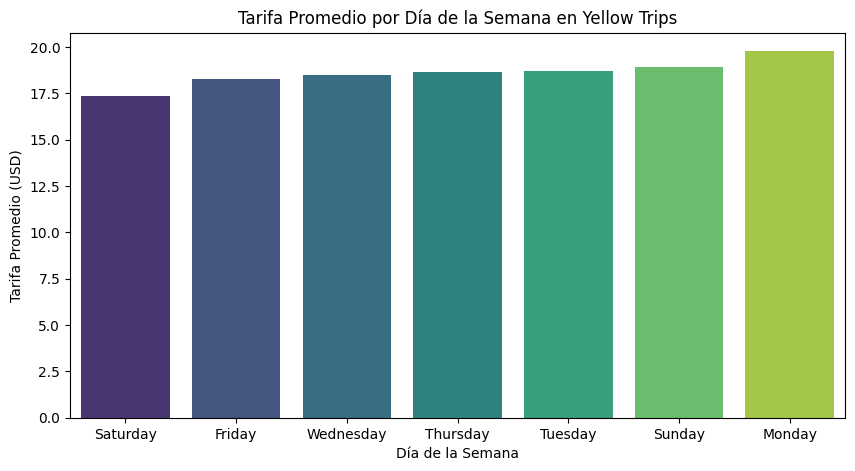

In [62]:
# Calcular la tarifa promedio por día de la semana
mean_fare_by_day = yellow_trips.groupby('day_of_week')['fare_amount'].mean().sort_values()

# Graficar la tarifa promedio por día de la semana
plt.figure(figsize=(10, 5))
sns.barplot(x=mean_fare_by_day.index, y=mean_fare_by_day.values, palette='viridis')
plt.title('Tarifa Promedio por Día de la Semana en Yellow Trips')
plt.xlabel('Día de la Semana')
plt.ylabel('Tarifa Promedio (USD)')
plt.show()

#### Por Hora del Día

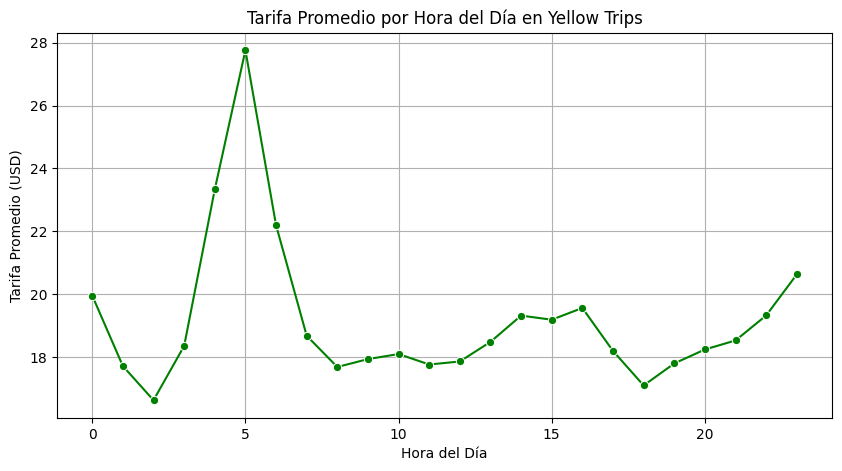

In [63]:
# Calcular la tarifa promedio por hora del día
mean_fare_by_hour = yellow_trips.groupby('hour_of_day')['fare_amount'].mean()

# Graficar la tarifa promedio por hora del día
plt.figure(figsize=(10, 5))
sns.lineplot(x=mean_fare_by_hour.index, y=mean_fare_by_hour.values, marker='o', color='green')
plt.title('Tarifa Promedio por Hora del Día en Yellow Trips')
plt.xlabel('Hora del Día')
plt.ylabel('Tarifa Promedio (USD)')
plt.grid(True)
plt.show()

### Paso 5: Distribución de Tarifas por Intervalos

Podemos agrupar las tarifas en intervalos y ver cuántos viajes caen dentro de cada uno de ellos.

In [64]:
# Definir intervalos de tarifas
bins_fare = [0, 5, 10, 15, 20, 30, 40, 50, 100]
labels_fare = ['0-5 USD', '5-10 USD', '10-15 USD', '15-20 USD', '20-30 USD', '30-40 USD', '40-50 USD', '50+ USD']

# Agrupar las tarifas por intervalos
yellow_trips['fare_binned'] = pd.cut(yellow_trips['fare_amount'], bins=bins_fare, labels=labels_fare)

# Contar la cantidad de viajes en cada intervalo de tarifas
fare_counts = yellow_trips['fare_binned'].value_counts().sort_index()

C:\Users\david\AppData\Local\Temp\ipykernel_12072\3372439774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fare_counts.index, y=fare_counts.values, palette='plasma')


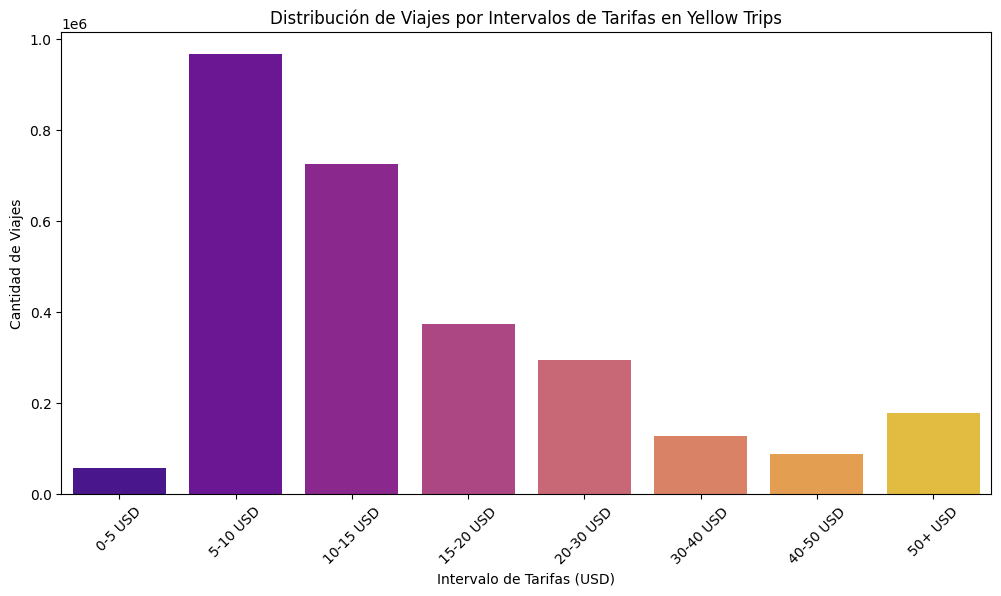

In [65]:
# Graficar la distribución por intervalos de tarifas
plt.figure(figsize=(12, 6))
sns.barplot(x=fare_counts.index, y=fare_counts.values, palette='plasma')
plt.title('Distribución de Viajes por Intervalos de Tarifas en Yellow Trips')
plt.xlabel('Intervalo de Tarifas (USD)')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=45)
plt.show()

In [66]:
yellow_trips.to_parquet('..\\Data\\yellow_tripdata.parquet')

In [67]:
fhv_trips.to_parquet('..\\Data\\fhv_tripdata.parquet')

In [68]:
green_trips.to_parquet('..\\Data\\green_tripdata.parquet')